## CUSTOMER CHURN

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.shape

(7043, 21)

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [9]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
missing_counts= df.isna().sum()
missing_percent= (missing_counts/len(df))*100
print(missing_percent)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64


In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# task 1

### first lets create insightful visualizations to understand the relationships between features and the Churn target

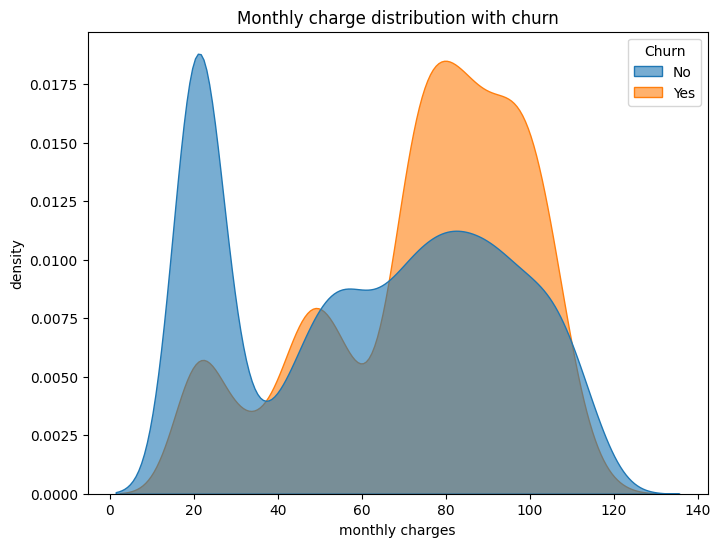

In [13]:
# monthly charges and churn
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x="MonthlyCharges",hue="Churn",fill= True,common_norm=False,alpha = 0.6)
plt.title("Monthly charge distribution with churn")
plt.xlabel("monthly charges")
plt.ylabel("density")
plt.show()

#### The density plot shows the distribution of monthly charges for customers who churned versus those who did not.We see that higher monthly charges are associated with greater likelhood of churn

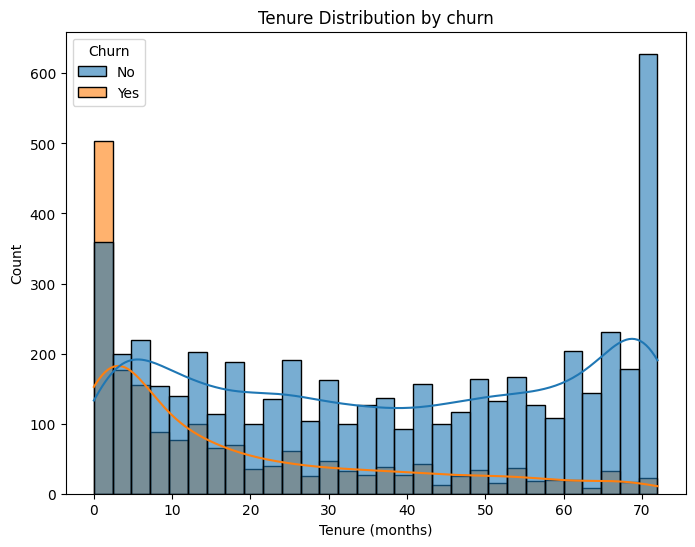

In [ ]:
#tenure vs churn
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="tenure",bins=30,kde=True,hue="Churn",alpha = 0.6)
plt.title("Tenure Distribution by churn")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.show()

### This graph indicates that new customers are more likely to churn, while long-term customers are more likely to stay.

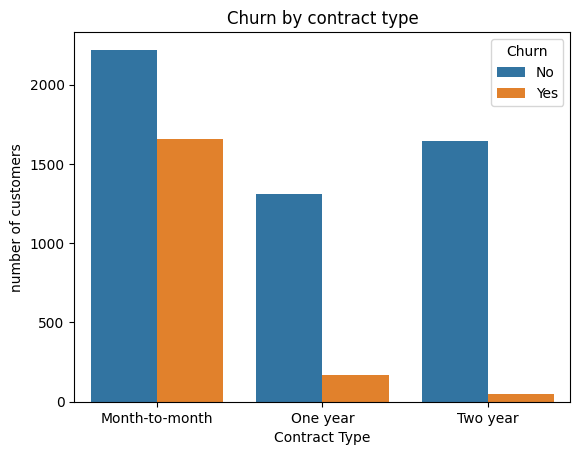

In [39]:
#churn vs contract
plt.Figure(figsize=(8,6))
sns.countplot(data=df,x="Contract",hue='Churn')
plt.title("Churn by contract type")
plt.xlabel("Contract Type")
plt.ylabel("number of customers")
plt.show()

#### The bar chart shows that month to month contracts have higher churn indicating customers with flexible contracts are more likely to leave where as one year and two year show much loer churn.This highlights contract type as a strong factor influencing churn.

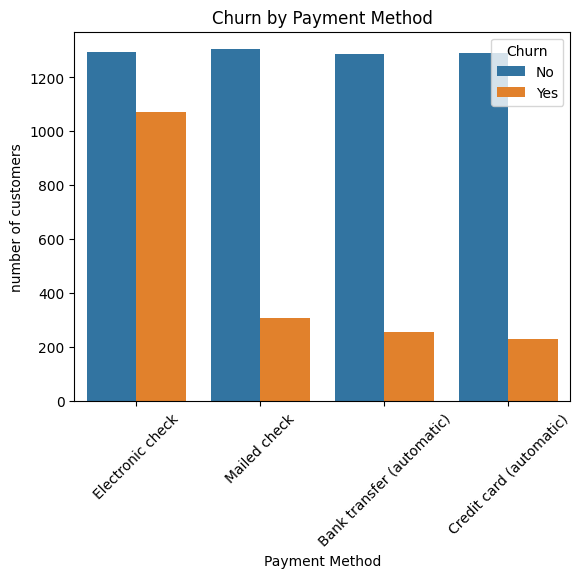

In [40]:
# churn vs payment
plt.Figure(figsize=(10,6))
sns.countplot(data=df,x="PaymentMethod",hue='Churn')
plt.title("Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("number of customers")
plt.xticks(rotation=45)
plt.show()

#### The bar chart shows Customers using Electronic Check have the highest churn compared to other methods Customers using Mailed Check, Bank Transfer (automatic), or Credit Card (automatic) have significantly lower churn rates.  This suggests that automatic payment methods are linked with higher customer retention, while electronic check users are more likely to churn.

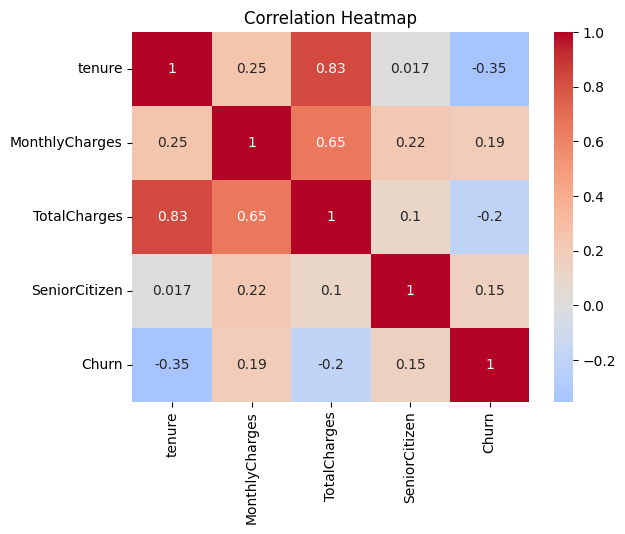

In [42]:
#correlation heatmap

corr_df = df[['tenure','MonthlyCharges','TotalCharges','SeniorCitizen','Churn']].copy()
corr_df['Churn'] = corr_df['Churn'].map({'Yes':1,'No':0})
plt.Figure(figsize=(8,6))
sns.heatmap(corr_df.corr(),annot=True,cmap='coolwarm',center=0)
plt.title("Correlation Heatmap")
plt.show()

### The heatmap shows that tenure has the strongest negative correlation with churn (-0.35), while monthly charges (0.19) and senior citizen (0.15) have weak positive correlations. Total charges (-0.20) also negatively correlate with churn, reflecting loyalty from long-term customers.


# Task 2

In [14]:
#Feature engineering
df['AvgMonthlyCharges'] = df['TotalCharges']/df['tenure'].replace(0,1)

services = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']

df['ServicesCount'] = df[services].apply(lambda row: sum(row=='Yes'),axis=1)


### A new feature AvgMonthlyCharges is created to captures how much a customer typically spends each month, regardless of how long they have been with the company.A new feature ServicesCount is created to represent the number of additional services a customer has subscribed to.his feature reflects the level of engagement a customer has with the company.

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgMonthlyCharges,ServicesCount
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.850000,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,55.573529,3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,54.075000,3
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40.905556,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,75.825000,1


# Task 3

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [17]:
X = df.drop(columns=['Churn','customerID'] + services)
y=df['Churn'].map({'Yes':1,'No':0})

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
numeric_features = ['tenure','MonthlyCharges','TotalCharges','AvgMonthlyCharges','ServicesCount']
categorical_features = [ col for col in X.columns if col not in numeric_features]

In [19]:
#pipleine
numeric_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("encoder",OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num",numeric_transformer,numeric_features),
        ("cat",categorical_transformer,categorical_features)
    ]
)


### This ensures that both numeric and categorical variables are properly preprocessed in a single unified pipeline, making the workflow clean and reproducible.

In [20]:
pipeline_logreg = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("classifier",LogisticRegression(max_iter=1000))
])


In [21]:
pipeline_logreg.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = pipeline_logreg.predict(X_test)

print("Classification Report: ")
print(classification_report(y_test,y_pred))

print("Confusion Matrix: ")
print(confusion_matrix(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.55      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Confusion Matrix: 
[[943  93]
 [166 207]]


#### The model is biased towards predicting "No Churn", which is common in imbalanced datasets. Improving recall for churn (class 1) should be a priority

# Task 4

In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

#### Following 3 models we'll choose for now: 1. Logistic regression(as it is simple and highly interpretable it will help us to get a sense of problem  and establish a benchmark performance).2. Random Forest Classifier:(It is known for its ability to handle non-linear relationships and its robustness against overfitting. It's a great choice for this type of mixed-feature data and often provides high accuracy without extensive hyperparameter tuning.) 3. Gradient Boosting Classifier:(This is a more advanced ensemble method that typically delivers top-tier performance on structured datasets. By building trees sequentially and correcting the errors of previous trees, it can capture complex patterns in the data. This would be a strong candidate for achieving the best possible accuracy)

In [27]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting":GradientBoostingClassifier(random_state=42)
}

for name,cf in models.items():
    pipe = Pipeline(steps=[("preprocessor",preprocessor),
                           ("classifier",cf)])
    scores = cross_val_score(pipe,X_train, y_train,cv=5,scoring="f1_weighted")
    print(f"{name}: mean f1_weighted ={scores.mean():.4f}")

Logistic Regression: mean f1_weighted =0.7841
Random Forest: mean f1_weighted =0.7721
Gradient Boosting: mean f1_weighted =0.7805


#### Thus from the weighted F1 score we find that logistic regression is the best performing model for now

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid={
    "classifier__C": [0.01,0.1,1,10,100],
    "classifier__penalty":['l1','l2'],
    "classifier__solver":["liblinear","saga"]
}

grid_search = GridSearchCV(
    estimator=pipeline_logreg,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2,
)

In [30]:
grid_search.fit(X_train,y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,Pipeline(step..._iter=1000))])
,param_grid,"{'classifier__C': [0.01, 0.1, ...], 'classifier__penalty': ['l1', 'l2'], 'classifier__solver': ['liblinear', 'saga']}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [77]:
print("Best Parameters:", grid_search.best_params_)
print("Best f1_weighted Score (CV):", grid_search.best_score_)

y_pred= grid_search.predict(X_test)
print("Test ROC AUC:", roc_auc_score(y_test, y_pred))
print("Test f1_weighted:", f1_score(y_test, y_pred, average="weighted"))
print("Classification Report:", classification_report(y_test, y_pred))

Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best f1_weighted Score (CV): 0.7848675726372616
Test ROC AUC: 0.7325957228772243
Test f1_weighted: 0.8093402560383558
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.55      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      1409



##### The tuned Logistic Regression model balances simplicity and performance.

# Task 5

In [31]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
from imblearn.pipeline import Pipeline as Imbpipelearn
from imblearn.over_sampling import SMOTE

In [34]:
smote_logreg_pipe = Imbpipelearn(steps=[
    ("preprocessor", preprocessor),
    ("smote",SMOTE(random_state=42)),
    ("classifier",LogisticRegression(max_iter=1000,random_state=42))
])

smote_logreg_pipe.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [35]:
y_pred_smote = smote_logreg_pipe.predict(X_test)

print("Classification Report (with SMOTE):")
print(classification_report(y_test, y_pred_smote))
print("Test ROC AUC:", roc_auc_score(y_test, y_pred_smote))
print("Test f1_weighted:", f1_score(y_test, y_pred_smote, average="weighted"))


Classification Report (with SMOTE):
              precision    recall  f1-score   support

           0       0.93      0.71      0.81      1036
           1       0.52      0.86      0.65       373

    accuracy                           0.75      1409
   macro avg       0.73      0.78      0.73      1409
weighted avg       0.82      0.75      0.77      1409

Test ROC AUC: 0.7847567981616239
Test f1_weighted: 0.7655942483796334


Before SMOTE (Best Logistic Regression):  
- Recall (Churn = 1): 0.55 
- Precision (Churn = 1): 0.69 
- F1-score (Churn = 1): 0.62 
- Weighted F1: 0.81  

After SMOTE: 
- Recall (Churn = 1): 0.86  (↑ significant improvement)  
- Precision (Churn = 1): 0.52 (↓ dropped due to more false positives)  
- F1-score (Churn = 1):0.65
- Weighted F1:0.77 

SMOTE greatly improved the model’s ability to detect churners(high recall), which is critical in churn prediction since missing churners (false negatives) is more costly than incorrectly flagging non-churners (false positives). However, this came at the expense of precision and overall accuracy. 

# Task 6

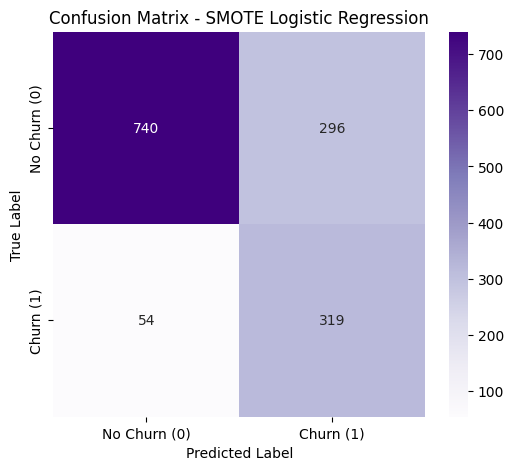

In [36]:
cm = confusion_matrix(y_test, y_pred_smote)
labels = ['No Churn (0)', 'Churn (1)']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SMOTE Logistic Regression')
plt.show()

Confusion Matrix Interpretation: 
False Negatives (Churn predicted as No Churn = 54):Risky for the business, as these customers might leave without any retention effort.  
False Positives (No Churn predicted as Churn = 296): Less harmful; retention efforts may be wasted on loyal customers but are usually less costly than losing a churner. 

Further Insights:  
In customer churn, False Negatives are worse than False Positives. It is better to incorrectly flag a loyal customer than to miss a churner who might actually leave.  
By applying SMOTE, we prioritized higher recall to minimize false negatives, aligning the model with the business goal of retaining as many at-risk customers as possible.